<a href="https://colab.research.google.com/github/JaimeSparks/Python/blob/master/Jaime_Golf_Predictions_KP_Updates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Should we play golf?



Today, we will be testing a decision tree model. To predict whether or not we should golf.

You will need to add some code to complete this notebook.  Follow along with the slides to find out what code to add.  You will add them where the narrative says "ADD" and insert that where the code says "\*\*\*ADD CODE HERE\*\*\*"

## Seed and Target Data
### Import packages that we need to explore and visualize our data.
ADD Import statements

In [0]:
# Import the appropriate packages:
from sklearn import tree
import pandas as pd

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

### "Collect" the data
Load in our weather data and whether or not we played golf

In [0]:
#create empty data frame
golf_df = pd.DataFrame() 

# add outlook
golf_df['Outlook'] = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 
                     'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
                     'overcast', 'rainy']

#add temperature
golf_df['Temperature'] = [92, 86, 83, 50, 60, 53, 62,
                         75, 57, 72, 78, 69, 61, 71]

#add humidity
golf_df['Humidity'] = [40.3, 63.1, 35.3, 86.3, 72.4, 22.7, 27.0,
                      80.7, 15.4, 25.1, 18.6, 58.3, 47.2, 39.3]

#add windy
golf_df['Windy'] = ['false', 'true', 'false', 'false', 'false', 'true', 'true',
                   'false', 'false', 'false', 'true', 'true', 'false', 'true']

#finally add play
golf_df['Play'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 
                   'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']

In [3]:
# Check what our DataFrame looks like
golf_df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,92,40.3,false,no
1,sunny,86,63.1,true,no
2,overcast,83,35.3,false,yes
3,rainy,50,86.3,false,yes
4,rainy,60,72.4,false,yes
5,rainy,53,22.7,true,no
6,overcast,62,27.0,true,yes
7,sunny,75,80.7,false,no
8,sunny,57,15.4,false,yes
9,rainy,72,25.1,false,yes


This data is not ready for machine learning because there are both categorical and numerical values, and our model can only interpret numerical values.  We need to turn strings and chars into integers.

### Process the Data
ADD the columns to one-hot encode

In [4]:
# one hot encoding using pandas
one_hot_data = pd.get_dummies(golf_df[['Outlook', 'Windy']])

# print out this new formatted data to see what happened
one_hot_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Windy_false,Windy_true
0,0,0,1,1,0
1,0,0,1,0,1
2,1,0,0,1,0
3,0,1,0,1,0
4,0,1,0,1,0
5,0,1,0,0,1
6,1,0,0,0,1
7,0,0,1,1,0
8,0,0,1,1,0
9,0,1,0,1,0


Now the columns that were categorical are now numerical.  Feel free to go back and check that these numbers make sense with our original data.

We now need to combine the one-hot encoded data that we just created with the numerical columns of temperature and humidity from our original DataFrame.  To do this, we will use the pandas `join` function.

In [5]:
# Joining together the continuous and dummy variables into one DataFrame
golf_one_hot = golf_df[['Temperature', 'Humidity']].join(one_hot_data)

# print out this new formatted data to see what happened
golf_one_hot

,Temperature,Humidity,Outlook_overcast,Outlook_rainy,Outlook_sunny,Windy_false,Windy_true
0,92,40.3,0,0,1,1,0
1,86,63.1,0,0,1,0,1
2,83,35.3,1,0,0,1,0
3,50,86.3,0,1,0,1,0
4,60,72.4,0,1,0,1,0
5,53,22.7,0,1,0,0,1
6,62,27.0,1,0,0,0,1
7,75,80.7,0,0,1,1,0
8,57,15.4,0,0,1,1,0
9,72,25.1,0,1,0,1,0


Great! Now we have both the original numerical data and the new numerically-encoded categorical data in one data set.  Now our data is ready for modeling!

### Predictive Modeling
First we will create an empty decision tree, then we will fit the decision tree with all of our weather data as the inputs, and whether or not we played golf as our target.  Finally, we will render our tree so we can take a look at our decision tree.

ADD inputs and target data to fit statement

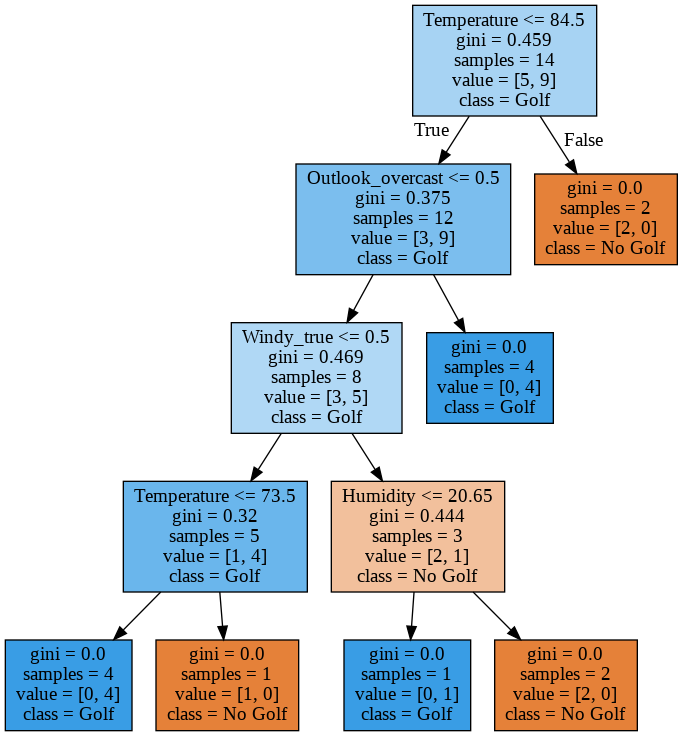

In [6]:
# Create empty DecisionTree
clf = tree.DecisionTreeClassifier()

#fit our decision tree with inputs, target
clf_train = clf.fit(golf_one_hot, golf_df['Play'])

# Render our tree.
dot_data = tree.export_graphviz(
    clf_train, out_file=None,
    feature_names=golf_one_hot.columns,
    class_names=['No Golf', 'Golf'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Finally, we can use our decision tree to make some predictions.  First, run our prediction.  Then change aroud some of the numbers (use this weekend's weather?) to see what the model predicts!

In [7]:
#Running our prediction
#Columns are: [Temperature, Humidity, Outlook_overcast, Outlook_rainy, Outlook_sunny, Windy_false, Windy_true]
prediction = clf_train.predict([[84.6, 1.0, 1, 0, 0, 1, 0]])
print(prediction)

['no']


#### Challenge
For added practice and to improve your model, think about what other factors would help make better predictions about whether or not you should golf. Add those to your DataFrame in the **"Collect" the Data** section, then run the rest of your code to see how your decision tree changes.  

Things to keep in mind:
- You will need the same number of data points in your new column as in the rest of the DataFrame
- If your new data point is categorical, make sure you encode it
- Your prediction will need to include that column(s) 

In [8]:
# Starter code to copy and paste into to the ""Collect" the Data" cell above:
golf_df['column_name'] = ['list', 'of', 'data', 'points...']

ValueError: ignored